In [1]:
import numpy as np

In [2]:
import pandas as pd
# usa o pandas para ler csv
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
# pega os 5 primeiros elementos
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()


,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
troca = {
    0 : 1,
    1 : 0
}
# cria uma nova coluna "finalizado" recebendo o mapeamento do valor inverso da coluna "nao_finalizado"
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [5]:
# ultimos 5 elementos
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

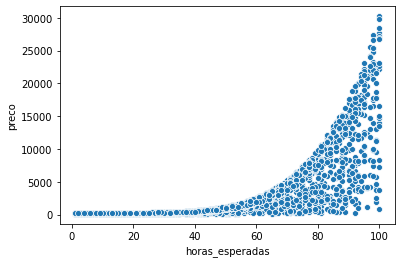

In [6]:
import seaborn as sns
# seaborn para plotar os graficos
#passa o nome das colunas para as 2 dimensoes e o pandas que contem os dados
sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

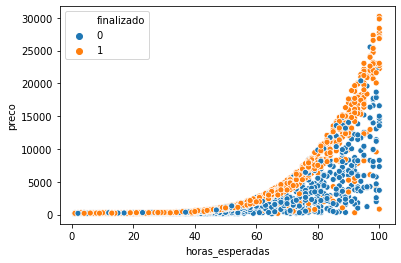

In [7]:
# passa o parametro hue que define cores de acordo com a coluna recebida
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

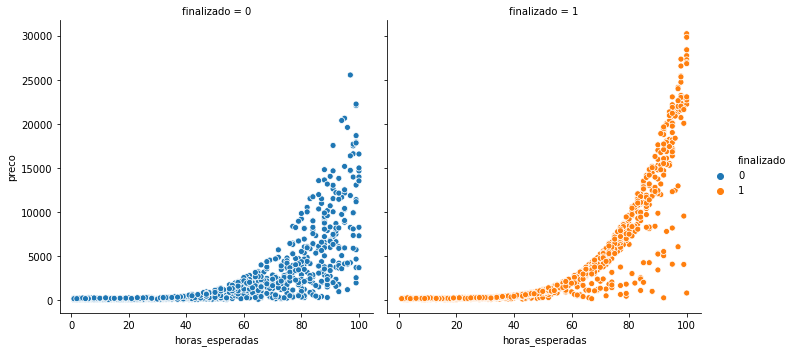

In [8]:
# replot mostra o grafico separadamente de acordo com a coluna "col"
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)

In [9]:
# separa os valores dos resultados
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

#cria uma semente para manter a consistencia dos testes e treinos
SEED = 5
# passando um valor para np.random.seed, faz com que train_test_split e no linearSVC 
# leiam a mesma seed e assim nao precisa passar como parametro
np.random.seed(SEED)
# a funcao train_test_split divide os dados que serao utilizados no treino ou no teste
# stratify = separar treino e teste proporcionalmente a coluna y para garantir que não vão 
# ser muitos de certa categoria e poucos de outra
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# modelando
modelo = LinearSVC()
#treinando
modelo.fit(treino_x, treino_y)
# testando
previsoes = modelo.predict(teste_x)

#calculando a acuracia
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 49.26%


/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [11]:
import numpy as np
#criando previsoes de base para comparar o acerto da base com o nosso modelo criado acima
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia do algoritmo de baseline foi %.2f%%" % acuracia)

A acurácia do algoritmo de baseline foi 52.59%


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

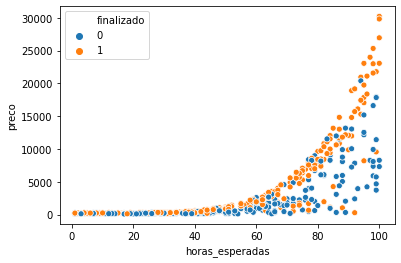

In [12]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x)

In [13]:
#valores maximo e minimo de cada dimensao
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)

1 100 100 30223


In [14]:
# preenche o eixo x e y criando varios pontos ao longo dos dois eixos
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [15]:
# mesclando as duas dimensoes
xx, yy = np.meshgrid(eixo_x, eixo_y)
# ravel concatena os elementos de xx e yy
# c_ mescla os dados de x e y, formando as tuplas (x,y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [16]:
# Z são as classificações
Z = modelo.predict(pontos)
# redimensiona os 10000 pontos criados para 100x100
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

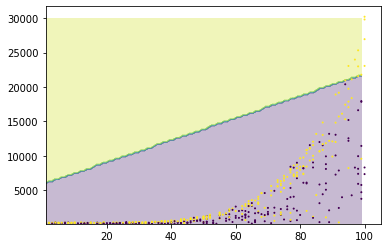

In [17]:
import matplotlib.pyplot as plt

# desenha o contorno da curva de decisão
plt.contourf(xx, yy, Z, alpha=0.3)

#plota o grafico usando matplotlib, passando as colunas das dimensoes, 
# color c = valor da classificacao e tamanho s dos pontos
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# DECISION BOUNDARY

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# usano agora um estimador não linear para tratar graficos como desse exemplo que nao se resolvem em linha reta
modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.19%


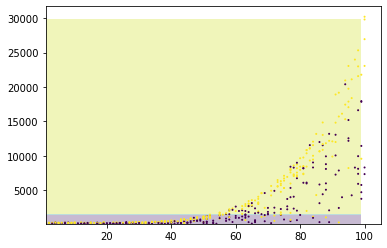

In [19]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# DECISION BOUNDARY
# o problema de algoritmos como o SVC, é que eles são muito suscetíveis a escala
#enquanto o eixo x vai de 0 a 100, o y vai de 0 a 30000, isso atrapalha o algoritmo pois ele vai dar menos valor as variacoes de x e mais ao y 
#e precisamos reescalar tudo para uma mesma faixa

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 50
np.random.seed(SEED)
#treino x original, teste x original, treino
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#fase de pre-processamento
# o standardScaler já faz o trabalho de escalar os valores para um mesmo interval
scaler = StandardScaler()
scaler.fit(raw_treino_x)
#reescreve o treino e teste x na nova escala
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
#treina o modelo com a nova escala
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 69.26%


In [21]:
#treino x e teste x agora são um array de arrays, enquanto antes eram um dataframe do pandas
treino_x

array([[ 0.38667852, -0.26807202],
       [-0.46256993, -0.52053666],
       [ 0.77591739,  0.45720421],
       ...,
       [-1.20566232, -0.57192499],
       [-0.39179922, -0.52404041],
       [ 1.37746838,  2.36480136]])

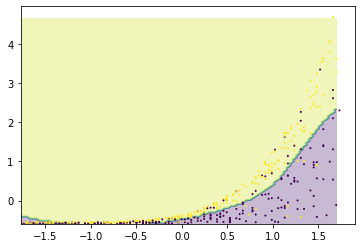

In [22]:
# data_x antigo na coluna 0 são as horas esperadas, na coluna 1 são os preços
data_x = teste_x[:,0]
data_y = teste_x[:,1]

# copiando o codigo anterior de plot de grafico e substituindo agora as variaveis utilizadas 
x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

# DECISION BOUNDARY